In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eeg-psychiatric-disorders-dataset/EEG.machinelearing_data_BRMH.csv


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [3]:
from keras.callbacks import ModelCheckpoint
import pickle
from sklearn.model_selection import cross_val_score

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('/kaggle/input/eeg-psychiatric-disorders-dataset/EEG.machinelearing_data_BRMH.csv')

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Columns: 1149 entries, no. to COH.F.gamma.r.O1.s.O2
dtypes: float64(1144), int64(1), object(4)
memory usage: 8.3+ MB
None


In [7]:
data.shape

(945, 1149)

In [8]:
data.head(10)

,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,M,57.0,2012.8.30,NaN,NaN,Addictive disorder,Alcohol use disorder,35.998557,21.717375,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,2,M,37.0,2012.9.6,6.0,120.0,Addictive disorder,Alcohol use disorder,13.425118,11.002916,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,3,M,32.0,2012.9.10,16.0,113.0,Addictive disorder,Alcohol use disorder,29.941780,27.544684,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,4,M,35.0,2012.10.8,18.0,126.0,Addictive disorder,Alcohol use disorder,21.496226,21.846832,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,5,M,36.0,2012.10.18,16.0,112.0,Addictive disorder,Alcohol use disorder,37.775667,33.607679,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662
5,6,F,24.0,2012.11.21,14.0,105.0,Addictive disorder,Alcohol use disorder,13.482096,14.095855,...,92.841723,82.302355,83.938567,88.213886,90.972026,77.443894,89.545596,72.579530,89.462863,86.127823
6,7,F,26.0,2012.12.3,16.0,103.0,Addictive disorder,Alcohol use disorder,21.780747,26.655328,...,73.017845,50.593309,56.250644,46.572808,69.617082,51.808149,56.495169,52.526873,62.801103,56.710212
7,8,M,23.0,2013.1.17,12.0,104.0,Addictive disorder,Alcohol use disorder,11.704212,10.600361,...,91.645799,63.962652,58.120225,69.767127,80.165627,58.648915,79.533814,35.510554,45.811328,60.417464
8,9,M,24.0,2013.2.15,17.0,89.0,Addictive disorder,Alcohol use disorder,8.531635,8.668278,...,47.703314,34.685504,38.526848,75.189718,47.003045,32.248734,77.707001,33.095903,67.985045,65.377007
9,10,F,30.0,2013.2.8,12.0,98.0,Addictive disorder,Alcohol use disorder,14.853668,12.614058,...,83.249851,39.820829,70.283171,64.150040,63.783769,45.423004,61.922878,19.639653,54.220350,53.456534


In [9]:
data['education'].dtypes

dtype('float64')

In [10]:
data = data.fillna(data.mean())

In [11]:
data.head()

,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,M,57.0,2012.8.30,13.43871,101.580472,Addictive disorder,Alcohol use disorder,35.998557,21.717375,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,2,M,37.0,2012.9.6,6.00000,120.000000,Addictive disorder,Alcohol use disorder,13.425118,11.002916,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,3,M,32.0,2012.9.10,16.00000,113.000000,Addictive disorder,Alcohol use disorder,29.941780,27.544684,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,4,M,35.0,2012.10.8,18.00000,126.000000,Addictive disorder,Alcohol use disorder,21.496226,21.846832,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,5,M,36.0,2012.10.18,16.00000,112.000000,Addictive disorder,Alcohol use disorder,37.775667,33.607679,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662


In [12]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

encoder.fit(data[['sex']])
data['sex']= encoder.transform(data[['sex']])
encoder.fit(data[['main.disorder']])
data['main.disorder']= encoder.transform(data[['main.disorder']])

encoder.fit(data[['specific.disorder']])
data['specific.disorder']= encoder.transform(data[['specific.disorder']])


In [13]:
data = data.drop(columns =['no.', 'eeg.date'], axis =1)

In [14]:
sum(data.isnull().sum())

945

In [15]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
X= data.drop(columns=['main.disorder','Unnamed: 122'], axis=1)
y = data['main.disorder']

In [16]:
elastic_net = ElasticNet( alpha =.1, l1_ratio= .5)
elastic_net.fit(X, y)

ElasticNet(alpha=0.1)

In [17]:
coef_abs = np.abs(elastic_net.coef_)
sorted_coef_abs = np.argsort(coef_abs)[::-1]
top_50_features = sorted_coef_abs[:50]

In [18]:
top_50_feature_names = [X.columns[i] for i in top_50_features]

<AxesSubplot:xlabel='main.disorder', ylabel='count'>

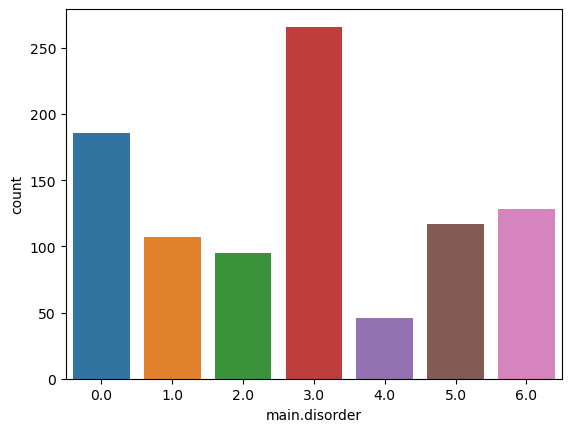

In [19]:
sns.countplot(x="main.disorder",data=data)

In [20]:
df1=[]

In [21]:
for j in list(top_50_feature_names):
   df1.append(data[j])

In [22]:
 df1 = pd.concat(df1, axis = 1)

In [23]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy ='all', random_state = 42)
X_resampled, y_resampled = smote.fit_resample(df1, y)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_resampled)
# y = y.reshape(-1,1)
df3= scaler.transform(X_resampled)
# y= scaler.transform(y)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df3, y_resampled , test_size =.2, stratify = y_resampled, random_state=42)

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

In [27]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

In [28]:
from sklearn.model_selection import KFold, cross_val_score

In [29]:
def my_function(model):
    model.fit(X_train, y_train)
    test_data_prediction = model.predict(X_test)
    accuracy = accuracy_score(y_test, test_data_prediction)
    # Check if the current model has the highest accuracy so far
    if accuracy > my_function.best_accuracy:
        my_function.best_accuracy = accuracy
        # Save the best model as a pkl file
        pickle.dump(model, open('/kaggle/working/best_model.pkl','wb'))
        my_function.counter = my_function.counter + 1
    precision = precision_score(test_data_prediction, y_test, average='weighted')
    precision1 = precision_score(test_data_prediction, y_test, average='macro')
    precision2 = precision_score(test_data_prediction, y_test, average='micro')
    recall = recall_score(y_test, test_data_prediction, average='weighted')
    recall1 = recall_score(y_test, test_data_prediction, average='macro')
    recall2 = recall_score(y_test, test_data_prediction, average='micro')
    f1_score = 2 * (precision * recall) / (precision + recall)
    f1_score1 = 2 * (precision1 * recall1) / (precision1 + recall1)
    f1_score2 = 2 * (precision2 * recall2) / (precision2+ recall2)
    kf = KFold(n_splits=10, shuffle=True)



    # Evaluate model using cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=kf)
    print(scores)

    # Print average score
    print("Cross Validation Accuracy: %0.4f" % scores.mean())
    # fpr, tpr, thresholds = metrics.roc_curve(Y_test, test_data_prediction)
    # auc = metrics.auc(fpr, tpr)
    print('Accuracy score of the model', model , '=', round(accuracy,4))
    print('Weighted Precision score of the model', model , '=', round(precision,4))
    print('Macro Precision1 score of the model', model , '=', round(precision1,4))
    print('Micro Precision2 score of the model', model , '=', round(precision2,4))
    print('Weighted Recall score of the model', model , '=', round(recall,4))
    print('Macro Recall1 score of the model', model , '=', round(recall1,4))
    print('Micro Recall2 score of the model', model , '=', round(recall2,4))
    print('Weighted F1_score score of the model', model , '=', round(f1_score,4))
    print('Macro F1_score1 score of the model', model , '=', round(f1_score1,4))
    print('Micro F1_score2 score of the model', model , '=', round(f1_score2,4))
    # print('Cross validation accuracies for the', model, '=', cv_score, 'and', mean_accuracy)
    # print('AUC score for the', model, '=', round(auc,4))


    cr= classification_report(y_test, test_data_prediction) 

    print(cr)



In [30]:
# Initialize the best_accuracy attribute
my_function.best_accuracy = 0
my_function.counter=0

In [31]:
my_function(lgb.LGBMClassifier())

[0.96644295 0.97315436 1.         0.98657718 0.97986577 0.98657718
 0.95973154 0.98657718 0.98657718 0.99324324]
Cross Validation Accuracy: 0.9819
Accuracy score of the model LGBMClassifier() = 0.9786
Weighted Precision score of the model LGBMClassifier() = 0.9817
Macro Precision1 score of the model LGBMClassifier() = 0.9788
Micro Precision2 score of the model LGBMClassifier() = 0.9786
Weighted Recall score of the model LGBMClassifier() = 0.9786
Macro Recall1 score of the model LGBMClassifier() = 0.9788
Micro Recall2 score of the model LGBMClassifier() = 0.9786
Weighted F1_score score of the model LGBMClassifier() = 0.9801
Macro F1_score1 score of the model LGBMClassifier() = 0.9788
Micro F1_score2 score of the model LGBMClassifier() = 0.9786
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        53
         1.0       0.98      1.00      0.99        53
         2.0       0.95      1.00      0.97        53
         3.0       0.96      1

In [32]:
my_function(GradientBoostingClassifier())

[0.98657718 0.99328859 0.97315436 1.         0.97986577 1.
 0.98657718 0.97986577 1.         0.99324324]
Cross Validation Accuracy: 0.9893
Accuracy score of the model GradientBoostingClassifier() = 0.9866
Weighted Precision score of the model GradientBoostingClassifier() = 0.9878
Macro Precision1 score of the model GradientBoostingClassifier() = 0.9868
Micro Precision2 score of the model GradientBoostingClassifier() = 0.9866
Weighted Recall score of the model GradientBoostingClassifier() = 0.9866
Macro Recall1 score of the model GradientBoostingClassifier() = 0.9868
Micro Recall2 score of the model GradientBoostingClassifier() = 0.9866
Weighted F1_score score of the model GradientBoostingClassifier() = 0.9872
Macro F1_score1 score of the model GradientBoostingClassifier() = 0.9868
Micro F1_score2 score of the model GradientBoostingClassifier() = 0.9866
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        53
         1.0       0.98   

In [33]:
my_function(XGBClassifier())

[0.97986577 0.99328859 0.98657718 0.98657718 0.99328859 0.98657718
 1.         0.98657718 0.98657718 0.99324324]
Cross Validation Accuracy: 0.9893
Accuracy score of the model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...) = 0.9866
Weighted Precision score of the model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
 

In [34]:
my_function.best_accuracy

0.9865951742627346

In [35]:
#number of the saved model
my_function.counter

2

In [36]:
pickle.dump(encoder, open('/kaggle/working/encoder.pkl','wb'))

In [37]:
pickle.dump(scaler, open('/kaggle/working/scaler.pkl','wb'))

In [38]:
pickle.dump(top_50_feature_names, open('/kaggle/working/top_50_feature_names.pkl','wb'))